# marketing_data_set

## Data preparation

#### Data set explanation

#### The data set describes marketing data fro some of online gami

### Get Libraries

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Bring data

In [4]:
df = pd.read_csv(r'C:\Users\P0032697\Desktop\Job search\SciPlay\marketing_data_set.csv')
df.head()

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users
0,game_1,8/5/2018,5/17/2020,ios,source_7,ua,campagin_7,1795.694333,1146.167667,1553,23.0
1,game_5,2/25/2019,2/24/2020,ios,source_5,retargeting,campagin_4,2024.653333,1367.520667,274,72.0
2,game_5,10/28/2019,1/12/2021,amazon,source_3,ua,campagin_1,2532.533333,1200.123000,161,182.0
3,game_4,7/26/2018,5/13/2020,ios,source_7,retargeting,campagin_6,2035.251333,311.756000,668,55.0
4,game_1,3/6/2020,6/11/2021,ios,source_3,retargeting,campagin_2,3242.279667,675.151667,534,126.0


In [5]:
# Understanding the data

In [6]:
print(f'the data frame has {df.shape[0]} row over {df.shape[1]} columns')

the data frame has 4362 row over 11 columns


In [7]:
# Sampling data Scource

In [8]:
df.sample(2)

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users
178,game_5,12/13/2020,3/8/2021,amazon,source_1,ua,campagin_2,559.520000,413.554000,1439,70.0
346,game_2,10/6/2019,4/9/2021,web,source_9,ua,campagin_3,3000.449333,938.429333,1809,155.0


### Data dictionary

In [10]:
'''
Game = Game name
Instal_date = Installation of the game
event_date = Assumption: this would be a date when we sample the data


'''

'\nGame = Game name\nInstal_date = Installation of the game\nevent_date = Assumption: this would be a date when we sample the data\n\n\n'

### Cleanup of the data

In [11]:
# Null values
# As we see, the dataset contains many null values

In [12]:
df.isnull().sum()

game              150
install_date       96
event_date          0
platform          174
source              0
source_type         0
campagin_id         0
revenue             0
cost              446
installs            0
#_paying_users    150
dtype: int64

In [13]:
# Checking NULL values in Game column

In [14]:
game_null_filter = df['game'].isnull()
df[game_null_filter]

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users
11,NaN,5/29/2018,1/28/2020,amazon,source_3,organic,campagin_6,2761.820667,NaN,1771,NaN
68,NaN,7/20/2018,10/1/2021,web,source_4,ua,campagin_7,428.066333,0.0,1448,NaN
91,NaN,6/8/2019,9/19/2021,android,source_3,ua,campagin_2,1292.828667,0.0,489,NaN
94,NaN,3/26/2019,1/26/2021,ios,source_4,ua,campagin_4,2400.379333,0.0,836,NaN
118,NaN,5/25/2020,11/25/2020,amazon,source_6,ua,campagin_4,2893.853000,0.0,751,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4145,NaN,5/17/2020,2/13/2021,ios,source_2,ua,campagin_6,2343.857667,0.0,1293,NaN
4230,NaN,7/18/2019,1/23/2021,android,source_1,retargeting,campagin_2,3089.233667,0.0,782,NaN
4237,NaN,4/22/2019,9/19/2020,amazon,source_1,ua,campagin_1,1061.285333,0.0,1517,NaN
4241,NaN,10/1/2019,2/22/2021,android,source_9,organic,campagin_7,1787.477333,NaN,401,NaN


In [15]:
# We I see, it'd be better to get rid of these 150 rows, where game is NULL.(Paying_users - NaN, Cost - Nan or 0)

In [16]:
df.drop(df[game_null_filter].index, inplace=True)
df

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users
0,game_1,8/5/2018,5/17/2020,ios,source_7,ua,campagin_7,1795.694333,1146.167667,1553,23.0
1,game_5,2/25/2019,2/24/2020,ios,source_5,retargeting,campagin_4,2024.653333,1367.520667,274,72.0
2,game_5,10/28/2019,1/12/2021,amazon,source_3,ua,campagin_1,2532.533333,1200.123000,161,182.0
3,game_4,7/26/2018,5/13/2020,ios,source_7,retargeting,campagin_6,2035.251333,311.756000,668,55.0
4,game_1,3/6/2020,6/11/2021,ios,source_3,retargeting,campagin_2,3242.279667,675.151667,534,126.0
...,...,...,...,...,...,...,...,...,...,...,...
4357,game_5,6/10/2018,12/20/2020,android,source_5,retargeting,campagin_0,357.977000,655.499000,1278,113.0
4358,game_4,9/19/2019,4/14/2020,android,source_10,ua,campagin_2,974.694000,1379.978667,643,200.0
4359,game_1,10/6/2020,8/2/2021,android,source_11,organic,campagin_4,485.358000,NaN,725,77.0
4360,game_5,5/31/2019,11/26/2020,ios,source_12,ua,campagin_4,638.931333,294.266667,589,117.0


In [17]:
# Checking NULL values in Install_date column

In [18]:
install_Date_null_filter = df['install_date'].isnull()
df[install_Date_null_filter]

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users
18,game_7,NaN,2/10/2020,android,source_8,organic,campagin_0,1005.533333,NaN,237,138.0
45,game_1,NaN,12/25/2020,ios,source_2,ua,campagin_2,3341.174333,1307.088667,1157,179.0
58,game_7,NaN,4/21/2021,amazon,source_11,retargeting,campagin_0,1171.066667,433.577333,1424,72.0
74,game_5,NaN,12/19/2021,web,source_8,ua,campagin_7,2529.933333,1127.306667,1920,85.0
85,game_1,NaN,3/4/2021,web,source_10,retargeting,campagin_2,930.000000,800.970000,1110,118.0
...,...,...,...,...,...,...,...,...,...,...,...
4013,game_7,NaN,3/2/2020,android,source_7,retargeting,campagin_0,0.000000,1651.966000,1936,82.0
4031,game_4,NaN,12/3/2021,web,source_9,retargeting,campagin_0,0.000000,576.489667,727,170.0
4058,game_5,NaN,3/17/2020,NaN,source_3,retargeting,campagin_9,0.000000,933.507667,1909,140.0
4141,game_5,NaN,7/21/2020,amazon,source_11,ua,campagin_6,0.000000,1086.348333,1213,48.0


In [19]:
# AS we see, it looks we can leave in the meanwhile these 96 NULL rows in install_date

In [20]:
# Let us leave null values in the rest of the columns

In [21]:
# Let's make sure there are no negative values in Revenue, Cost, installs, #_paying_users columns

In [22]:
negative_rev_filter = df['revenue'] < 0
negative_cost_filter = df['cost'] < 0
negative_installs_filter = df['installs'] < 0
negative_paying_users_filter = df['#_paying_users'] < 0
df2 = df[negative_rev_filter] | df[negative_cost_filter] | df[negative_installs_filter] | df[negative_paying_users_filter]
df2

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users


In [23]:
# As we see, there are no negative values in these 4 measure columns. Therefore no need to remove these rows

### Data types validation

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4212 entries, 0 to 4361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game            4212 non-null   object 
 1   install_date    4122 non-null   object 
 2   event_date      4212 non-null   object 
 3   platform        4038 non-null   object 
 4   source          4212 non-null   object 
 5   source_type     4212 non-null   object 
 6   campagin_id     4212 non-null   object 
 7   revenue         4212 non-null   float64
 8   cost            3788 non-null   float64
 9   installs        4212 non-null   int64  
 10  #_paying_users  4212 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 394.9+ KB


In [25]:
# AS we see, install_date &  event_date are OBJECT type. This is not good. Let's change the data type of these columns.
# We do not change #_paying_users to INT since there are Blank values

In [26]:
df['install_date'] = pd.to_datetime(df['install_date'])
df['event_date'] = pd.to_datetime(df['event_date'])

### Now, let's have a look at duplicate rows

In [27]:
# Rows in our dataset
print(len(df))

4212


In [28]:
# Unique values we have in our data set
df.nunique()

game                7
install_date      532
event_date        442
platform            4
source             12
source_type         3
campagin_id        10
revenue           693
cost              702
installs          587
#_paying_users    192
dtype: int64

In [29]:
# As seen, we have to drill down to allocate duplicate rows. 

In [30]:
# Let's fine duplicate rows

In [31]:
df[df.duplicated]

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users
727,game_1,2018-08-05,2020-05-17,ios,source_7,ua,campagin_7,1795.694333,1146.167667,1553,23.0
730,game_4,2018-07-26,2020-05-13,ios,source_7,retargeting,campagin_6,2035.251333,311.756000,668,55.0
731,game_1,2020-03-06,2021-06-11,ios,source_3,retargeting,campagin_2,3242.279667,675.151667,534,126.0
733,game_4,2020-03-31,2021-02-03,amazon,source_11,ua,campagin_5,674.307333,1306.263333,1679,142.0
734,game_1,2019-01-31,2021-06-07,ios,source_1,ua,campagin_9,1189.051333,1510.354000,477,195.0
...,...,...,...,...,...,...,...,...,...,...,...
4357,game_5,2018-06-10,2020-12-20,android,source_5,retargeting,campagin_0,357.977000,655.499000,1278,113.0
4358,game_4,2019-09-19,2020-04-14,android,source_10,ua,campagin_2,974.694000,1379.978667,643,200.0
4359,game_1,2020-10-06,2021-08-02,android,source_11,organic,campagin_4,485.358000,NaN,725,77.0
4360,game_5,2019-05-31,2020-11-26,ios,source_12,ua,campagin_4,638.931333,294.266667,589,117.0


In [32]:
# WOW !!! 
# Most of our data set (2629 out of 4212 total rows) has multiple rows. 
# We have to check out the reason for this duplicate rows. 
# For this purpose, let's take, as a test, rows where revenue = 1795 & revenue = 2035

In [33]:
Rev_filter_1 = df['revenue'] == 1795.694333
Rev_filter_2 = df['revenue'] == 2035.251333
df2 = df[Rev_filter_1 | Rev_filter_2]
df2.sort_values('revenue')

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users
0,game_1,2018-08-05,2020-05-17,ios,source_7,ua,campagin_7,1795.694333,1146.167667,1553,23.0
727,game_1,2018-08-05,2020-05-17,ios,source_7,ua,campagin_7,1795.694333,1146.167667,1553,23.0
1454,game_1,2018-08-05,2020-05-17,ios,source_7,retargeting,campagin_7,1795.694333,1146.167667,1553,23.0
2181,game_1,2018-08-05,2020-05-17,ios,source_7,organic,campagin_7,1795.694333,NaN,1553,23.0
2908,game_1,2018-08-05,2020-05-17,ios,source_7,ua,campagin_7,1795.694333,1146.167667,1553,23.0
3635,game_1,2018-08-05,2020-05-17,ios,source_7,ua,campagin_7,1795.694333,1146.167667,1553,23.0
3,game_4,2018-07-26,2020-05-13,ios,source_7,retargeting,campagin_6,2035.251333,311.756000,668,55.0
730,game_4,2018-07-26,2020-05-13,ios,source_7,retargeting,campagin_6,2035.251333,311.756000,668,55.0
1457,game_4,2018-07-26,2020-05-13,ios,source_7,organic,campagin_6,2035.251333,NaN,668,55.0
2184,game_4,2018-07-26,2020-05-13,ios,source_7,ua,campagin_6,2035.251333,311.756000,668,55.0


In [34]:
# Conclusions:
# 1. Just for simplicity reason, we may say that organic source_type does not cost us. Therefore, we may set NaN values to zero
# 2. It looks like every row is duplicated. Let's check it out by grouping

In [35]:
result = df.groupby(['game','install_date','event_date', 'source_type', 'campagin_id', 'revenue']).count()
result.head(20)

platform  \
game   install_date event_date source_type campagin_id revenue                 
game_1 2018-01-07   2021-01-25 retargeting campagin_8  2319.103667         1   
                               ua          campagin_8  2319.103667         5   
       2018-01-11   2020-04-12 organic     campagin_6  2208.659333         1   
                               retargeting campagin_6  2208.659333         1   
                               ua          campagin_6  2208.659333         4   
       2018-01-19   2021-08-13 retargeting campagin_0  1406.880333         3   
                               ua          campagin_0  1406.880333         3   
       2018-01-24   2020-08-02 organic     campagin_6  2741.076667         1   
                               retargeting campagin_6  2741.076667         1   
                               ua          campagin_6  2741.076667         4   
       2018-01-29   2021-07-17 retargeting campagin_9  1731.867333         2   
                               ua          campagin_9  1731.867333         4   
       2018-02-08   2020-12-11 retargeting campagin_4  1731.806000         1   
                               ua          campagin_4  1731.806000         5   
       2018-02-12   2020-11-03 organic     campagin_9  537.078333          1   
                               retargeting campagin_9  537.078333          1   
                               ua          campagin_9  537.078333          4   
       2018-02-19   2020-01-02 retargeting campagin_3  944.808667          6   
       2018-02-25   2020-07-13 organic     campagin_4  1925.958333         1   
                               retargeting campagin_4  1925.958333         3   

                                                                    source  \
game   install_date event_date source_type campagin_id revenue               
game_1 2018-01-07   2021-01-25 retargeting campagin_8  2319.103667       1   
                               ua          campagin_8  2319.103667       5   
       2018-01-11   2020-04-12 organic     campagin_6  2208.659333       1   
                               retargeting campagin_6  2208.659333       1   
                               ua          campagin_6  2208.659333       4   
       2018-01-19   2021-08-13 retargeting campagin_0  1406.880333       3   
                               ua          campagin_0  1406.880333       3   
       2018-01-24   2020-08-02 organic     campagin_6  2741.076667       1   
                               retargeting campagin_6  2741.076667       1   
                               ua          campagin_6  2741.076667       4   
       2018-01-29   2021-07-17 retargeting campagin_9  1731.867333       2   
                               ua          campagin_9  1731.867333       4   
       2018-02-08   2020-12-11 retargeting campagin_4  1731.806000       1   
                               ua          campagin_4  1731.806000       5   
       2018-02-12   2020-11-03 organic     campagin_9  537.078333        1   
                               retargeting campagin_9  537.078333        1   
                               ua          campagin_9  537.078333        4   
       2018-02-19   2020-01-02 retargeting campagin_3  944.808667        6   
       2018-02-25   2020-07-13 organic     campagin_4  1925.958333       1   
                               retargeting campagin_4  1925.958333       3   

                                                                    cost  \
game   install_date event_date source_type campagin_id revenue             
game_1 2018-01-07   2021-01-25 retargeting campagin_8  2319.103667     1   
                               ua          campagin_8  2319.103667     5   
       2018-01-11   2020-04-12 organic     campagin_6  2208.659333     0   
                               retargeting campagin_6  2208.659333     1   
                               ua          campagin_6  2208.659333     4   
       2018-01-19   2021-08-13 retargeting campagin_0  140

In [36]:
# Let's find out why we have such a strange situation. Let's sample the data

In [37]:
Rev_filter_1 = df['revenue'] == 2319.103667
Rev_filter_2 = df['source_type'] == 'ua'
df2 = df[Rev_filter_1 & Rev_filter_2]
df2

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users
567,game_1,2018-01-07,2021-01-25,ios,source_10,ua,campagin_8,2319.103667,1254.338667,1497,50.0
1294,game_1,2018-01-07,2021-01-25,ios,source_10,ua,campagin_8,2319.103667,1254.338667,1497,50.0
2021,game_1,2018-01-07,2021-01-25,ios,source_10,ua,campagin_8,2319.103667,1254.338667,1497,50.0
2748,game_1,2018-01-07,2021-01-25,ios,source_10,ua,campagin_8,2319.103667,1254.338667,1497,50.0
4202,game_1,2018-01-07,2021-01-25,ios,source_10,ua,campagin_8,2319.103667,1254.338667,1497,50.0


#### Conclusion: looks like there is no reason for such duplicant rows. Therefore, we can get rid of these duplicates
#### + 
#### as we said previously, we convert {cost = NaN} to zero value - Organic cost is zero.

In [38]:
df.drop_duplicates(inplace = True)
df['cost'] = df['cost'].fillna(0)
df

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users
0,game_1,2018-08-05,2020-05-17,ios,source_7,ua,campagin_7,1795.694333,1146.167667,1553,23.0
1,game_5,2019-02-25,2020-02-24,ios,source_5,retargeting,campagin_4,2024.653333,1367.520667,274,72.0
2,game_5,2019-10-28,2021-01-12,amazon,source_3,ua,campagin_1,2532.533333,1200.123000,161,182.0
3,game_4,2018-07-26,2020-05-13,ios,source_7,retargeting,campagin_6,2035.251333,311.756000,668,55.0
4,game_1,2020-03-06,2021-06-11,ios,source_3,retargeting,campagin_2,3242.279667,675.151667,534,126.0
...,...,...,...,...,...,...,...,...,...,...,...
4301,game_5,2019-04-16,2020-12-16,ios,source_5,organic,campagin_3,2996.423333,0.000000,545,189.0
4320,game_4,2020-01-18,2021-02-22,ios,source_3,retargeting,campagin_0,1217.375333,1454.645667,1801,34.0
4329,game_7,2020-02-25,2021-08-04,android,source_1,organic,campagin_7,3234.599333,0.000000,927,189.0
4337,game_2,2018-11-27,2021-12-25,ios,source_8,retargeting,campagin_0,3180.818667,1021.903000,1989,47.0


In [39]:
# lets remove null values in platform either

In [40]:
platform_null_filter = df['platform'].isnull()
df = df.drop(df[platform_null_filter].index)
df

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users
0,game_1,2018-08-05,2020-05-17,ios,source_7,ua,campagin_7,1795.694333,1146.167667,1553,23.0
1,game_5,2019-02-25,2020-02-24,ios,source_5,retargeting,campagin_4,2024.653333,1367.520667,274,72.0
2,game_5,2019-10-28,2021-01-12,amazon,source_3,ua,campagin_1,2532.533333,1200.123000,161,182.0
3,game_4,2018-07-26,2020-05-13,ios,source_7,retargeting,campagin_6,2035.251333,311.756000,668,55.0
4,game_1,2020-03-06,2021-06-11,ios,source_3,retargeting,campagin_2,3242.279667,675.151667,534,126.0
...,...,...,...,...,...,...,...,...,...,...,...
4301,game_5,2019-04-16,2020-12-16,ios,source_5,organic,campagin_3,2996.423333,0.000000,545,189.0
4320,game_4,2020-01-18,2021-02-22,ios,source_3,retargeting,campagin_0,1217.375333,1454.645667,1801,34.0
4329,game_7,2020-02-25,2021-08-04,android,source_1,organic,campagin_7,3234.599333,0.000000,927,189.0
4337,game_2,2018-11-27,2021-12-25,ios,source_8,retargeting,campagin_0,3180.818667,1021.903000,1989,47.0


In [41]:
# Export data set to CSV file

In [42]:
df.to_csv(r'C:\Users\P0032697\Desktop\Job search\SciPlay\marketing_data_set_updated.csv', index=False)  

# EDA (Explorative Data Analysis)

In [ ]:
categorical = ['game', 'platform', 'source', 'source_type', 'campagin_id']
numerical = ['revenue', 'cost', 'installs', '#_paying_users']
df.head(2)

In [ ]:
# Summary statistics

In [ ]:
df.describe().transpose()

In [ ]:
# Summary statistics observation

In [ ]:
# Revenue:
# 1. Min Revenue = 0 (???) I believe, we have check it out. Perhaps, we must to delete this row,
    # since we must have done some sort of revenue
# Cost:
# 1. Cost has very large range: the STD is 547, while the average is 742. The MAX is 1665 --> The cost is positively skewed
# #_paying_users:
# 1. Min #_paying_users = 1 (???) I believe, we have check it out. Perhaps, we must to delete this row,
    # since it looks too small number

In [ ]:
# Validating Zero revenue 

In [ ]:
Rev_filter_less_1 = df['revenue'] < 1
df[Rev_filter_less_1]

In [ ]:
# It looks like we may delete these rows, since as I see Install_date is NaT, while there is installations

In [ ]:
df[Rev_filter_less_1]


#### Let us add new calculated column named 'profit' : Profit = Revenue - Cost

In [46]:
df['profit'] = df['revenue'] - df['cost']
df['profit'] = df['profit'].round(1)
df.head()

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users,profit
0,game_1,2018-08-05,2020-05-17,ios,source_7,ua,campagin_7,1795.694333,1146.167667,1553,23.0,649.5
1,game_5,2019-02-25,2020-02-24,ios,source_5,retargeting,campagin_4,2024.653333,1367.520667,274,72.0,657.1
2,game_5,2019-10-28,2021-01-12,amazon,source_3,ua,campagin_1,2532.533333,1200.123000,161,182.0,1332.4
3,game_4,2018-07-26,2020-05-13,ios,source_7,retargeting,campagin_6,2035.251333,311.756000,668,55.0,1723.5
4,game_1,2020-03-06,2021-06-11,ios,source_3,retargeting,campagin_2,3242.279667,675.151667,534,126.0,2567.1


#### Let us add new calculated column named 'profit_per_paying_user' : profit_per_paying_user = Profit / #_paying_users

In [47]:
df['profit_per_paying_user'] = df['profit'] /df['#_paying_users']
df['profit_per_paying_user'] = df['profit_per_paying_user'].round(1)
df.head()

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users,profit,profit_per_paying_user
0,game_1,2018-08-05,2020-05-17,ios,source_7,ua,campagin_7,1795.694333,1146.167667,1553,23.0,649.5,28.2
1,game_5,2019-02-25,2020-02-24,ios,source_5,retargeting,campagin_4,2024.653333,1367.520667,274,72.0,657.1,9.1
2,game_5,2019-10-28,2021-01-12,amazon,source_3,ua,campagin_1,2532.533333,1200.123000,161,182.0,1332.4,7.3
3,game_4,2018-07-26,2020-05-13,ios,source_7,retargeting,campagin_6,2035.251333,311.756000,668,55.0,1723.5,31.3
4,game_1,2020-03-06,2021-06-11,ios,source_3,retargeting,campagin_2,3242.279667,675.151667,534,126.0,2567.1,20.4


#### Let us add new calculated column named 'conversion' : conversion = #_paying_users / installs

In [48]:
df['conversion_%'] = df['#_paying_users'] / df['installs'] * 100
df['conversion_%'] = df['conversion_%'].round(1)
df.head()

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users,profit,profit_per_paying_user,conversion_%
0,game_1,2018-08-05,2020-05-17,ios,source_7,ua,campagin_7,1795.694333,1146.167667,1553,23.0,649.5,28.2,1.5
1,game_5,2019-02-25,2020-02-24,ios,source_5,retargeting,campagin_4,2024.653333,1367.520667,274,72.0,657.1,9.1,26.3
2,game_5,2019-10-28,2021-01-12,amazon,source_3,ua,campagin_1,2532.533333,1200.123000,161,182.0,1332.4,7.3,113.0
3,game_4,2018-07-26,2020-05-13,ios,source_7,retargeting,campagin_6,2035.251333,311.756000,668,55.0,1723.5,31.3,8.2
4,game_1,2020-03-06,2021-06-11,ios,source_3,retargeting,campagin_2,3242.279667,675.151667,534,126.0,2567.1,20.4,23.6


In [ ]:
# Distributions

In [ ]:
# Histogram of Revenue column
df['profit'].hist(bins=10)

# add labels and title
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit')

In [ ]:
# Histogram of Cost column
df['conversion'].hist(bins=20)

# add labels and title
plt.xlabel('conversion')
plt.ylabel('Frequency')
plt.title('Distribution of Conversion')

In [ ]:
# Dealing with Outliers

In [ ]:
col = 'profit'

q1 = df[col].quantile(.25)
q3 = df[col].quantile(.75)
iqr = q3 - q1

right_bound = df[col] < (q3 + iqr * 1.5)
left_bound = df[col] > (q1 - iqr * 1.5)

df = df[left_bound & right_bound]
df

In [ ]:
len(df)

### Categorical counts

In [51]:
df.head(7)

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users,profit,profit_per_paying_user,conversion_%
0,game_1,2018-08-05,2020-05-17,ios,source_7,ua,campagin_7,1795.694333,1146.167667,1553,23.0,649.5,28.2,1.5
1,game_5,2019-02-25,2020-02-24,ios,source_5,retargeting,campagin_4,2024.653333,1367.520667,274,72.0,657.1,9.1,26.3
2,game_5,2019-10-28,2021-01-12,amazon,source_3,ua,campagin_1,2532.533333,1200.123000,161,182.0,1332.4,7.3,113.0
3,game_4,2018-07-26,2020-05-13,ios,source_7,retargeting,campagin_6,2035.251333,311.756000,668,55.0,1723.5,31.3,8.2
4,game_1,2020-03-06,2021-06-11,ios,source_3,retargeting,campagin_2,3242.279667,675.151667,534,126.0,2567.1,20.4,23.6
5,game_6,2020-09-26,2020-12-14,android,source_6,ua,campagin_6,2351.323333,1074.519000,739,30.0,1276.8,42.6,4.1
6,game_4,2020-03-31,2021-02-03,amazon,source_11,ua,campagin_5,674.307333,1306.263333,1679,142.0,-632.0,-4.5,8.5


In [53]:
g1 = df.groupby(['game']).agg({'profit' : 'mean', 'conversion_%' : 'mean' })
g1


,profit,conversion_%
game,,
game_1,973.029187,17.318660
game_2,1236.307755,12.354286
game_3,1035.615982,14.544292
game_4,1363.797273,18.252727
game_5,887.053846,16.490842
game_6,962.698500,20.834000
game_7,1019.320675,18.099578


### Bivariate analysis

[Text(0.5, 1.0, 'Correlation chart')]

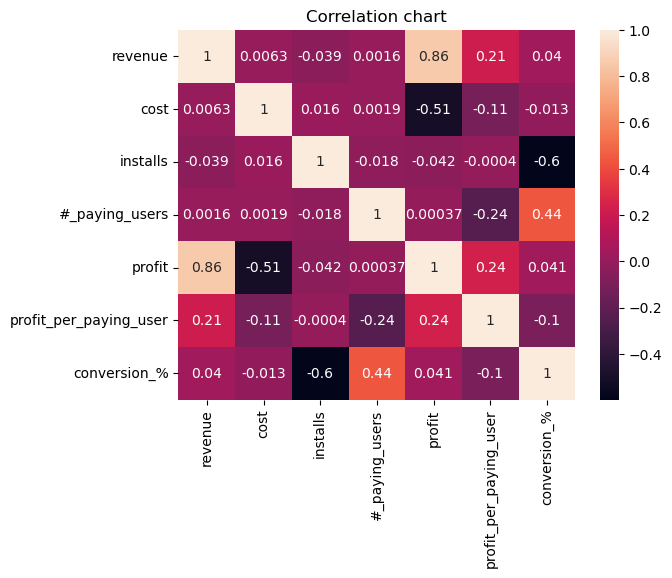

In [54]:
cols = ['revenue', 'cost', 'installs', '#_paying_users', 'profit', 'profit_per_paying_user', 'conversion_%']
corr_cols = df[cols]

sns.heatmap(corr_cols.corr(), annot = True).set(title = 'Correlation chart')

#### Let us visualize the correlation between revenue & installations

[Text(0.5, 1.0, 'Conversion installs Correlation')]

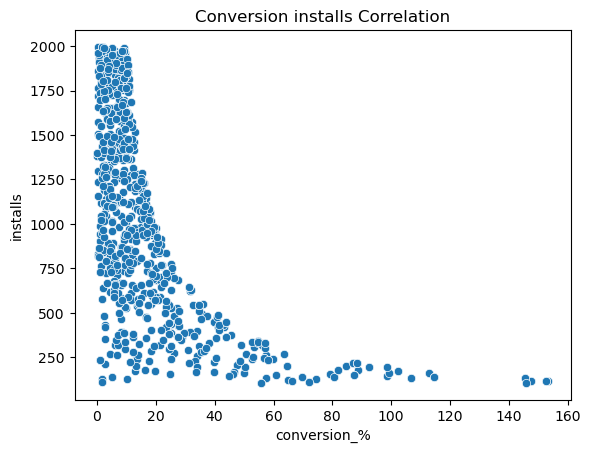

In [55]:
# df.head(5)

sns.scatterplot(data=df, x="conversion_%", y="installs").set(title='Conversion installs Correlation')

### Numeric to numeric observation
#### 1. Profit has NO correlation with # of installs, # of paying users or conversion rate- this sound to me not logical. I'd expect to see positive correlation.
#### 2. Another interesting point- negative correlation between installs & conversion. I'd like to see that higher number of installs brings to higher amount of paying customers. As we see, this is not not true in our case. Conclusion: we have to improve our conversion rate.


#### Let's see distribution of our numeric values for each game (in %)

In [56]:
df2 = df.groupby(['game']).agg({'revenue':'sum','cost':'sum', 'installs': 'sum', '#_paying_users': 'sum', 
                                'profit': 'sum'})
df3 = df2.sort_values(by=['revenue'], ascending = False)
df3.style.format("{:,.0f}")

total = df3.sum()
percentage = (df3 / total) * 100


print(percentage)

          revenue       cost   installs  #_paying_users     profit
game                                                              
game_2  16.237611  14.128401  16.789062       15.155183  17.719625
game_4  15.790807  13.283826  12.943810       14.074522  17.552312
game_5  15.292309  16.894000  16.613868       16.777409  14.166888
game_7  14.651069  15.389050  14.114732       14.847658  14.132566
game_3  13.400818  13.589826  14.212055       13.855303  13.267977
game_1  12.657602  13.740313  13.177481       12.651756  11.896905
game_6  11.969784  12.974585  12.148993       12.638170  11.263727


#### Let's see conversion rate for each game 

In [96]:
df2 = df.groupby(['game']).agg({'conversion_%':'mean'})
df2

,conversion_%
game,
game_1,17.318660
game_2,12.354286
game_3,14.544292
game_4,18.252727
game_5,16.490842
game_6,20.834000
game_7,18.099578


#### Conclusion: As we see, despite the fact that most revenue & profit are coming from game_2 & game_4, the highest conversion rate is for game_6. Therefore, we have to invest more money in game_6 promotion. This will increase our profits.


In [57]:
df2 = df.groupby(['source']).agg({'revenue':'sum','cost':'sum', 'installs': 'sum', '#_paying_users': 'sum', 
                                'profit': 'sum'})
df3 = df2.sort_values(by=['revenue'], ascending = False)
df3.style.format("{:,.0f}")

total = df3.sum()
percentage = (df3 / total) * 100


print(percentage)

             revenue       cost   installs  #_paying_users     profit
source                                                               
source_1   10.512018  10.570551  11.565591       12.479467  10.470872
source_8    9.513736   8.699374  10.205990        9.309118  10.085937
source_9    9.156579   9.286208   7.786634        9.057788   9.065495
source_11   8.661042   9.914838   8.258213        8.348874   7.780057
source_10   8.542118   8.387009   8.170974        8.274772   8.651117
source_7    8.379267   7.867696   9.240396        8.710741   8.738716
source_4    8.013848   8.673313   9.516433        8.521162   7.550482
source_5    7.962736   8.442336   7.865519        7.665279   7.625744
source_2    7.824401   6.974791   7.093556        7.373192   8.421401
source_3    7.817637   7.777718   7.100001        7.802369   7.845701
source_12   7.745581   7.177691   7.625582        7.517692   8.144587
source_6    5.871038   6.228474   5.571113        4.939545   5.619891


In [58]:
df2 = df.groupby(['source']).agg({'conversion_%':'mean'})
df2

,conversion_%
source,
source_1,19.211732
source_10,16.750000
source_11,14.954930
source_12,14.110569
source_2,18.323140
source_3,23.142276
source_4,12.678519
source_5,14.465041
source_6,17.369388


#### As seen, the highest conversion is in Source_3, while only a small portion of profit (8%) is coming from this souce. We have to invest more in this source.

In [ ]:
df2 = df.groupby(['campagin_id']).agg({'revenue':'sum','cost':'sum', 'installs': 'sum', '#_paying_users': 'sum', 
                                'profit': 'sum'})
df3 = df2.sort_values(by=['revenue'], ascending = False)
df3.style.format("{:,.0f}")

total = df3.sum()
percentage = (df3 / total) * 100


print(percentage)

In [ ]:
df2 = df.groupby(['campagin_id']).agg({'conversion':'mean'})
df2

### Time series analysis

In [73]:
df.head(1)

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users,profit,profit_per_paying_user,conversion_%,new
0,game_1,2018-08-05,2020-05-17,ios,source_7,ua,campagin_7,1795.694333,1146.167667,1553,23.0,649.5,28.2,1.5,profit


In [74]:
df['per'] = df.event_date.dt.to_period("M")
df.head(2)

,game,install_date,event_date,platform,source,source_type,campagin_id,revenue,cost,installs,#_paying_users,profit,profit_per_paying_user,conversion_%,new,per
0,game_1,2018-08-05,2020-05-17,ios,source_7,ua,campagin_7,1795.694333,1146.167667,1553,23.0,649.5,28.2,1.5,profit,2020-05
1,game_5,2019-02-25,2020-02-24,ios,source_5,retargeting,campagin_4,2024.653333,1367.520667,274,72.0,657.1,9.1,26.3,0,2020-02


#### Let us have a look at profit for every game over time

In [94]:
g = df.assign(
 game_1_profit = np.where(df['game']=='game_1',df.profit,0),
 game_2_profit = np.where(df['game']=='game_2',df.profit,0),
 game_3_profit = np.where(df['game']=='game_3',df.profit,0),
 game_4_profit = np.where(df['game']=='game_4',df.profit,0),
 game_5_profit = np.where(df['game']=='game_5',df.profit,0),
 game_6_profit = np.where(df['game']=='game_6',df.profit,0),
 game_7_profit = np.where(df['game']=='game_7',df.profit,0)
  ).groupby('per').agg({'game_1_profit':sum, 'game_2_profit':sum , 'game_3_profit':sum\
                       , 'game_4_profit':sum, 'game_5_profit':sum, 'game_6_profit':sum, 'game_7_profit':sum})\
.reset_index() 

g

,per,game_1_profit,game_2_profit,game_3_profit,game_4_profit,game_5_profit,game_6_profit,game_7_profit
0,2020-01,4352.4,4846.5,6703.9,-1227.6,9614.4,840.5,2351.2
1,2020-02,0.0,4726.1,6511.6,1160.8,14693.6,-1102.6,12102.9
2,2020-03,7056.7,0.0,16926.1,1429.8,7921.5,471.7,1926.5
3,2020-04,14762.8,3142.3,4209.0,10899.5,5854.4,4890.2,5796.0
4,2020-05,5262.7,2785.9,-57.8,17830.5,16892.7,12242.2,-1093.2
5,2020-06,4071.2,9782.5,5945.4,4387.9,10273.8,8283.7,9350.1
6,2020-07,10490.8,9799.3,12477.1,2019.4,-1633.1,15959.4,3388.4
7,2020-08,14753.1,4591.4,9745.9,7357.5,10276.3,5416.9,1646.8
8,2020-09,968.1,14474.0,3053.8,11585.7,24048.7,7908.3,11929.6
9,2020-10,2590.4,10971.0,7667.7,9555.8,1239.6,2810.9,6333.2


<Axes: xlabel='per'>

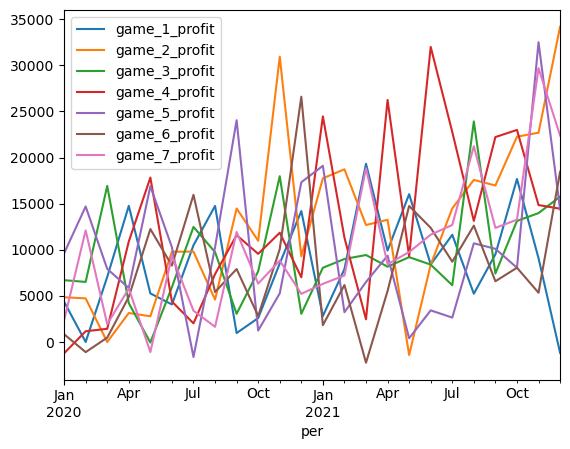

In [95]:
profit_col = ["game_1_profit", "game_2_profit", "game_3_profit", "game_4_profit",\
              "game_5_profit", "game_6_profit", "game_7_profit"]
g.plot(x = 'per', y = profit_col, kind='line')

#### As we see, the chart is too messy. Let us have a look at total profit over time

<Axes: xlabel='per'>

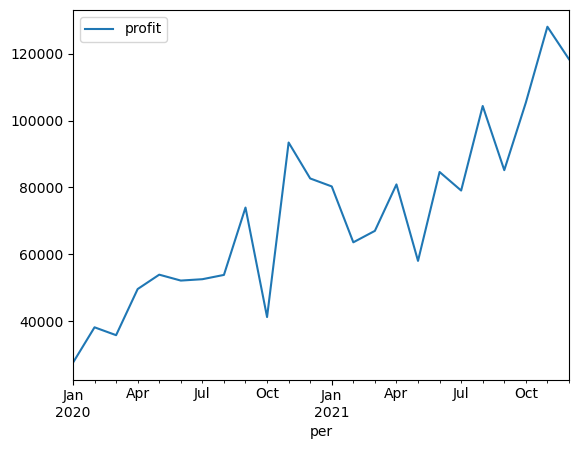

In [99]:
df2 = df.groupby(['per']).agg({'profit':'sum'}).reset_index()
df2.plot(x = 'per', y = ['profit'], kind = 'line')
